<a href="https://colab.research.google.com/github/itsmevidhyak/Research-Stuff/blob/master/Compound_Negative_Binomial_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compound distribution example in R

Say, if a random variable S is said to follow a compound negative binomial distribution, then number of claims N follow a Negative distribution with parameters k and p.

The random variable S is defined as $X_1+X_2+...+X_N$ represents the aggregate claim amount from a portfolio of insurance policies. $X_1,...,X_N$ are i.i.d. claim sizes and let's assume they follow lognormal distribution with parameters $\mu$ and $\sigma$ independent of $N$.

Let us simulate a set of observations from $S$. Assume $N \sim  NBin(700, 0.2)$ and $X \sim LogN(\mu = 4, \sigma^2 = 9)$. We will generate a sample of 1000 observations from $S$.

In [0]:
# Initiating the negative binomial distribution
set.seed(123)
n <- rnbinom(1000, size = 700, prob = 0.2)

# Initialise vector S to be of length = 1000 
s <- numeric(1000)

# Simulate the values with amounts from lognormal distribution
for ( i in 1:1000){
  x <- rlnorm(n[i], meanlog = 4, sdlog = 3)
  s[i] = sum(x)
}

In [0]:
summary(s)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  5501731   9039466  11148488  13510830  14418499 122838813 

In [0]:
head(s)

[1] 11873888 11724175 16714054  6463515 10849911 17969128

Let us take another example where the amounts $X_1,...,X_N$ follows Burr distribution. 

The example model specification is as follows: 

$N \sim Nbinom(5, 0.8)$ and $ X \sim Burr(\alpha = 0.3, \lambda = 10, \gamma = 1.2)$ Let us simulate a set of observations from $S$.

In [0]:
# Instantiate a negative binomial distribution
set.seed(123)
n <- rnbinom(1000, size = 5, prob = 0.8)

# Initialise vector S to be of length = 1000 
s <- numeric(1000)

# Let us write a function to generate random variates from the Burr(0.3,10,1.2) distribution
# Do we have these built in TFP?

rburr <- function(n, a, l, g){
  rb = (1 * ((1 - runif(n))^ (-1/a)-1)) ^ (1/g)
  rb
}

# Simulate the values with amounts from lognormal distribution
for ( i in 1:1000){
  x <- rburr(n[i], a = 0.3, l = 10, g = 1.2)
  s[i] = sum(x)
}

In [0]:
head(s)

[1]   30.50997   10.03019   22.98073   15.77280 6149.42536   10.48055

**How this will help us?**

We shall use this simulated claims data to estimate an insurer's claims experience. Say, now I can find $P(S > 30)$ easily to answer the question -  what's the probability that $S > 30$?

In [0]:
length(s[s>30])/length(s)

[1] 0.312

**Fitting a distribution to S**

Let us fit a normal distribution to the first compound negative binomial distribution we simulated.

In [0]:
# Initiating the negative binomial distribution
set.seed(123)
n <- rnbinom(1000, size = 700, prob = 0.2)

# Initialise vector S to be of length = 1000 
s <- numeric(1000)

# Simulate the values with amounts from lognormal distribution
for ( i in 1:1000){
  x <- rlnorm(n[i], meanlog = 4, sdlog = 3)
  s[i] = sum(x)
}

# Negative - loglikelihood function
f <- function(params){
  lnL = dnorm(s, mean = params[1], sd = params [2], log = TRUE)
  sum(-lnL)
}

# Specify start values and optimise for f
p <- c(mean(s), sd(s))
nlm <- nlm(f, p)
nlm


$minimum
[1] 17502.66

$estimate
[1] 13510830  9666900

$gradient
[1] 7.216272e-11 1.035489e-07

$code
[1] 2

$iterations
[1] 1

Therefore, $\hat{\mu} = 13.5 \  M, \hat{\sigma^2} = 9.7^2 M ^2$

Let us analyse the goodness of fit now.

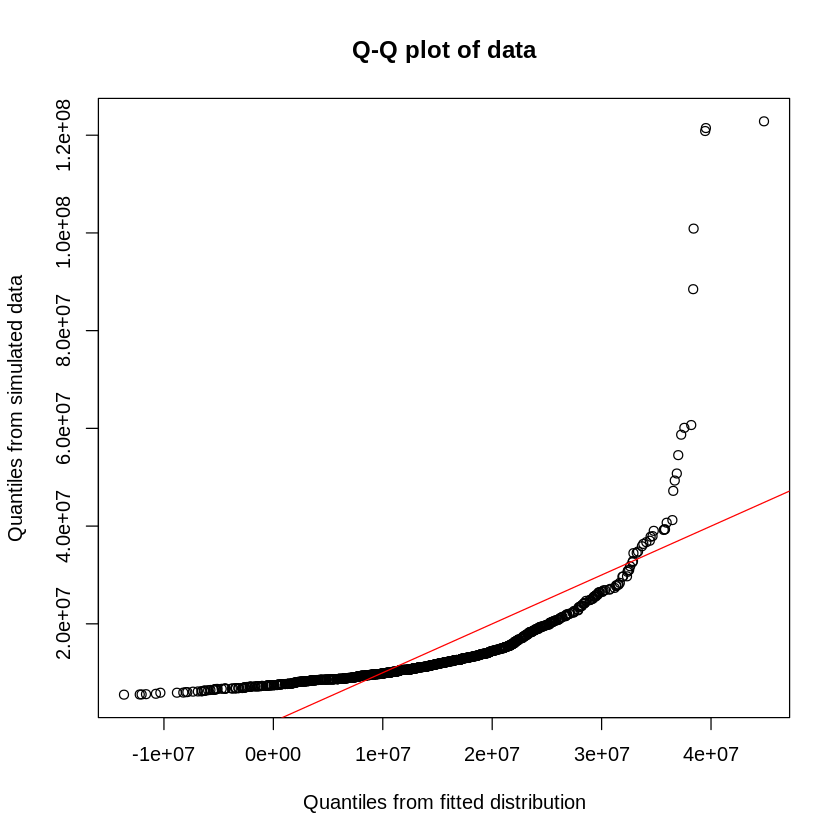

In [0]:
# Extract mean and deviation
mu <- nlm$estimate[1]
sigma <- nlm$estimate[2]

# Generate 1000 random variates from the above fitted distribution
set.seed(123)
agg <- rnorm(1000, mean = mu, sd = sigma)

# Plot the fit results
qqplot(agg, s, xlab = "Quantiles from fitted distribution", ylab = "Quantiles from simulated data", main = "Q-Q plot of data")
abline(0, 1, col = "red")

Q-Q plot reveals my sample is positively-skewed, which is what I would expect from a log-normal distribution.

Let us plot the fitted density function against the empirical density function to confirm this more clearly.


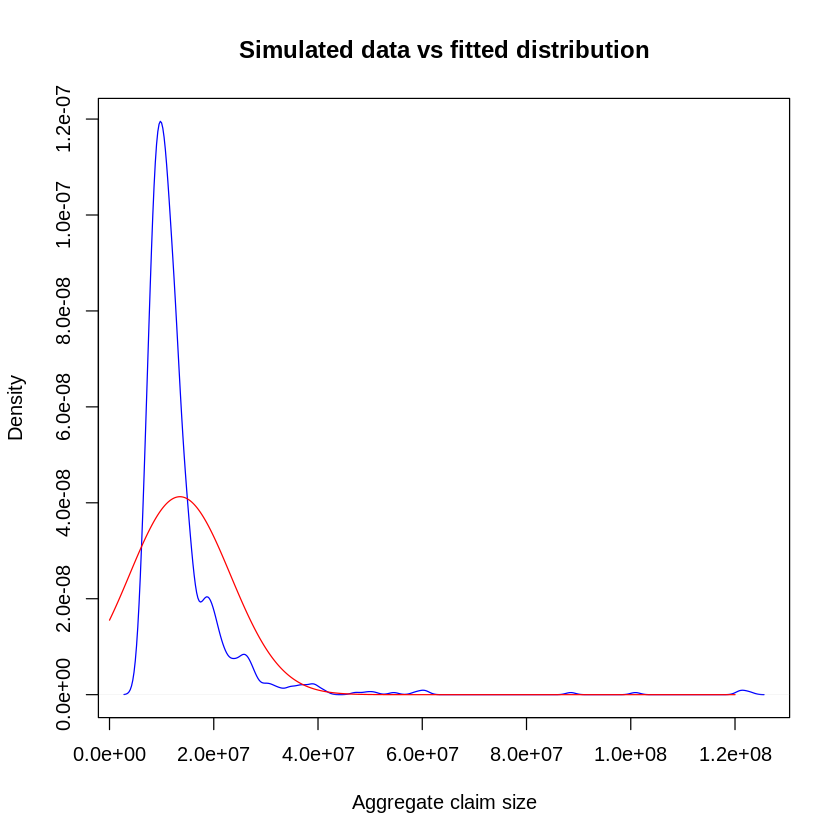

In [0]:
# Plot the density of simulated data
plot(density(s), main = "Simulated data vs fitted distribution", xlab = "Aggregate claim size", col = 'blue')

# Generate fitted values 
agg <- seq(from = 0, to = (1.2*10^8))
y <- dnorm(agg, mean = mu, sd = sigma)
lines(agg, y, col = 'red')

As revealed by the Q-Q plot, we can see significant differences between the data and fitted distribution.